## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

# importing data
df = pd.read_csv('/content/global_inflation_data.csv')


print("Original dataset:")
print(df.head())


print("\nMissing values before cleaning:")
print(df.isnull().sum())


df.fillna(method='ffill', inplace=True)


df['country_name'] = df['country_name'].astype('category')


df = df[df['1980'] >= 0]


df_melted = pd.melt(df, id_vars=['country_name', 'indicator_name'], var_name='year', value_name='inflation_rate')



df_filtered = df_melted[df_melted['indicator_name'] == 'Consumer Price Index']


print("\nCleaned and prepared dataset:")
print(df_filtered.head())


Original dataset:
  country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021   2022  2023  20

In [10]:

unique_indicators = df['indicator_name'].unique()
print("Unique Indicator Names:")
print(unique_indicators)


Unique Indicator Names:
['Annual average inflation (consumer prices) rate']


In [11]:
df_filtered = df_melted[df_melted['indicator_name'] == 'Consumer Price Index']


In [12]:

print(df_melted.head())


  country_name                                   indicator_name  year  \
0  Afghanistan  Annual average inflation (consumer prices) rate  1980   
1      Albania  Annual average inflation (consumer prices) rate  1980   
2      Algeria  Annual average inflation (consumer prices) rate  1980   
3      Andorra  Annual average inflation (consumer prices) rate  1980   
4       Angola  Annual average inflation (consumer prices) rate  1980   

   inflation_rate  
0            13.4  
1            13.4  
2             9.7  
3             9.7  
4            46.7  


## Bar chart

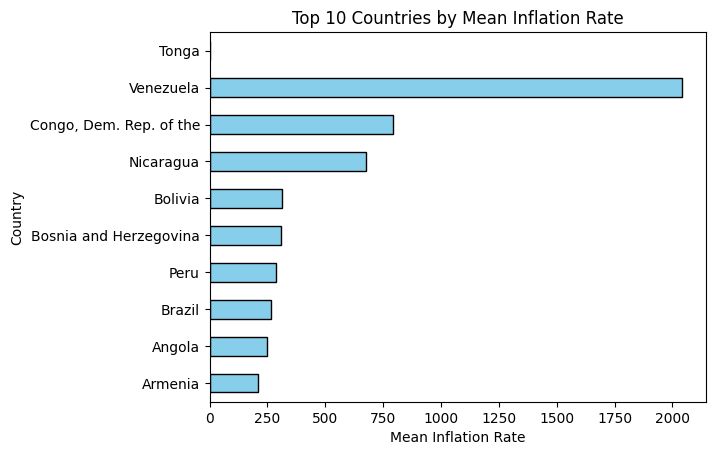

In [15]:

top_countries_count = 10  # Adjust this value as needed


top_countries = mean_inflation_by_country.tail(top_countries_count)


top_countries.plot(kind='barh', color='skyblue', edgecolor='black')


plt.xlabel('Mean Inflation Rate')
plt.ylabel('Country')
plt.title(f'Top {top_countries_count} Countries by Mean Inflation Rate')


plt.show()


## Scatter chart

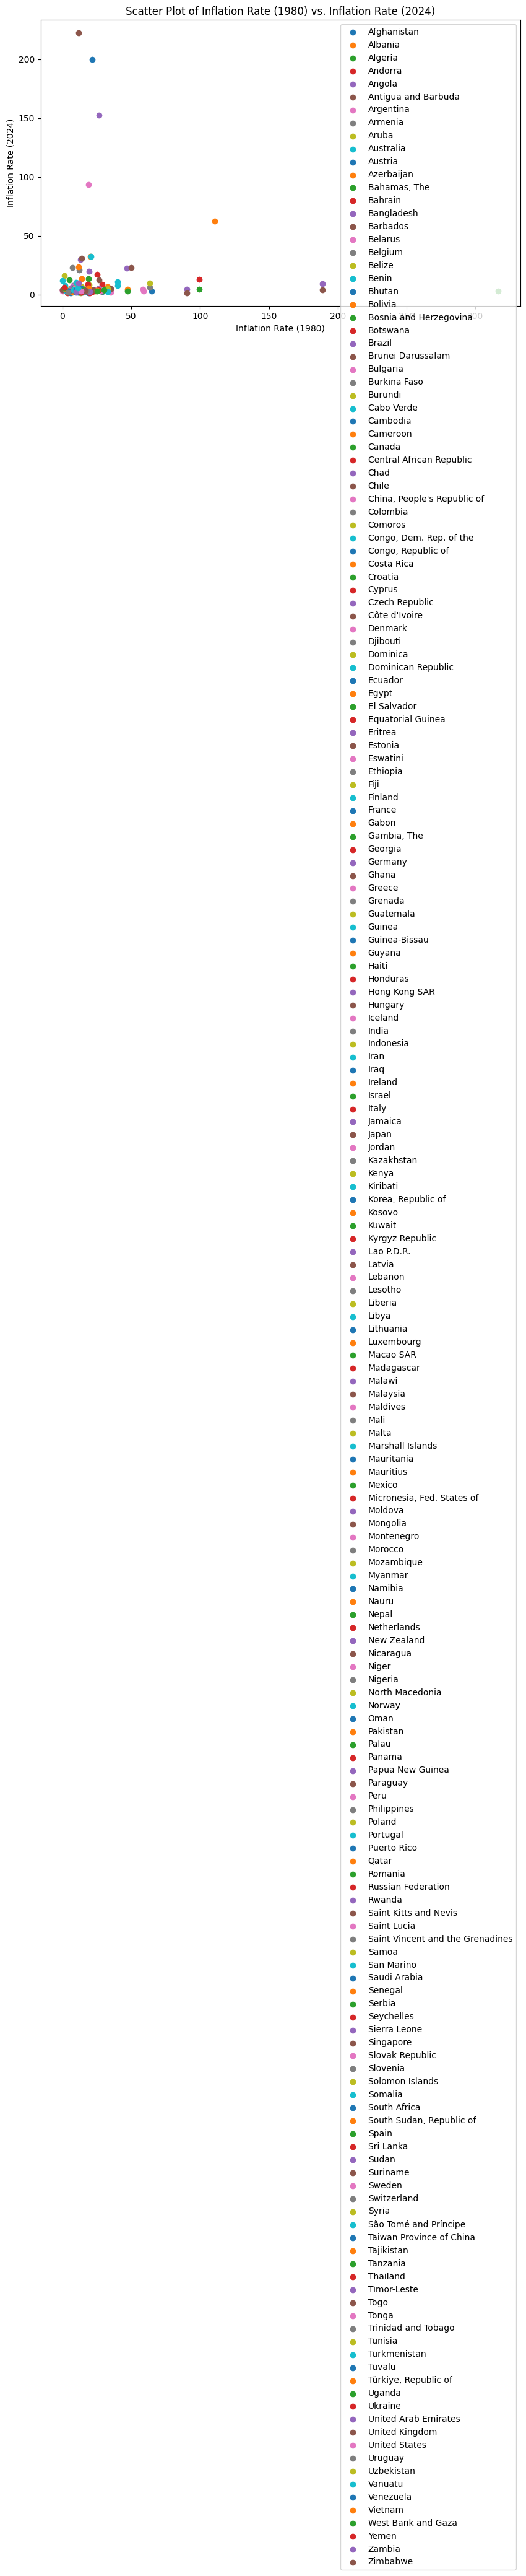

In [21]:

year1 = '1980'
year2 = '2024'


df_scatter = df_melted[(df_melted['year'] == year1) | (df_melted['year'] == year2)]


plt.figure(figsize=(10, 6))
for country, data in df_scatter.groupby('country_name'):
    plt.scatter(data[data['year'] == year1]['inflation_rate'],
                data[data['year'] == year2]['inflation_rate'],
                label=country)


plt.xlabel(f'Inflation Rate ({year1})')
plt.ylabel(f'Inflation Rate ({year2})')
plt.title(f'Scatter Plot of Inflation Rate ({year1}) vs. Inflation Rate ({year2})')


plt.legend()


plt.show()


## Line chart

<Figure size 1200x800 with 0 Axes>

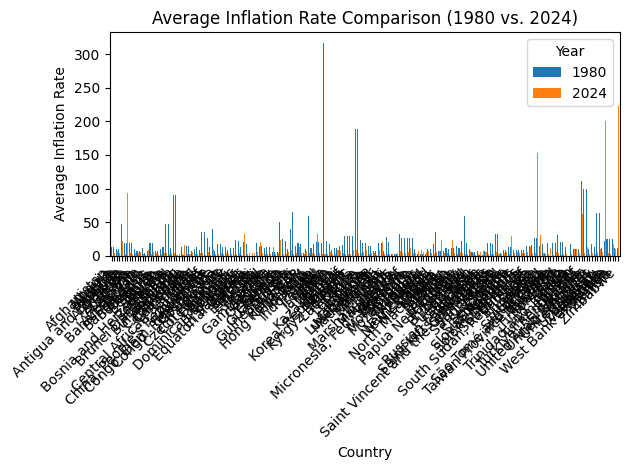

In [23]:

years = ['1980', '2024']
df_comparison = df_melted[df_melted['year'].isin(years)]
average_inflation = df_comparison.groupby(['country_name', 'year'])['inflation_rate'].mean().unstack()
plt.figure(figsize=(12, 8))
average_inflation.plot(kind='bar', width=0.8)
plt.title('Average Inflation Rate Comparison (1980 vs. 2024)')
plt.xlabel('Country')
plt.ylabel('Average Inflation Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd


df = pd.read_csv('/content/global_inflation_data.csv')

print("Original dataset:")
print(df.head())

print("\nMissing values before cleaning:")
print(df.isnull().sum())


df.fillna(method='ffill', inplace=True)

df['country_name'] = df['country_name'].astype('category')

df = df[df['1980'] >= 0]

df_melted = pd.melt(df, id_vars=['country_name', 'indicator_name'], var_name='year', value_name='inflation_rate')


df_filtered = df_melted[df_melted['indicator_name'] == 'Consumer Price Index']


average_inflation_by_country = df_filtered.groupby('country_name')['inflation_rate'].mean()

mean_inflation = df_filtered['inflation_rate'].mean()
std_inflation = df_filtered['inflation_rate'].std()
df_filtered['inflation_zscore'] = (df_filtered['inflation_rate'] - mean_inflation) / std_inflation


print("\nFiltered dataset:")
print(df_filtered.head())
print("\nAverage inflation rate by country:")
print(average_inflation_by_country.head())


Original dataset:
  country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021   2022  2023  20